In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

In [2]:
def EmbeddingAlg(param_list,guess,F):
    X = []
    for param in param_list:
        try:
            x_value = newton(F,guess,fprime=None,args=(param,),tol=1e-7,maxiter=50) #newtons method
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            return param_list[:len(X)],X
    return param_list, X

def F(x,lmbda):
    return lmbda*x - x**3

In [3]:
C1,X1 = EmbeddingAlg(np.linspace(-5,5,200)[::-1],np.sqrt(5),F) #each part of the pitchfork bifurcation

In [4]:
C2,X2 = EmbeddingAlg(np.linspace(-5,5,200)[::-1],-np.sqrt(5),F)

In [5]:
C3,X3 = EmbeddingAlg(np.linspace(-5,5,200)[::-1],0,F)

<IPython.core.display.Javascript object>


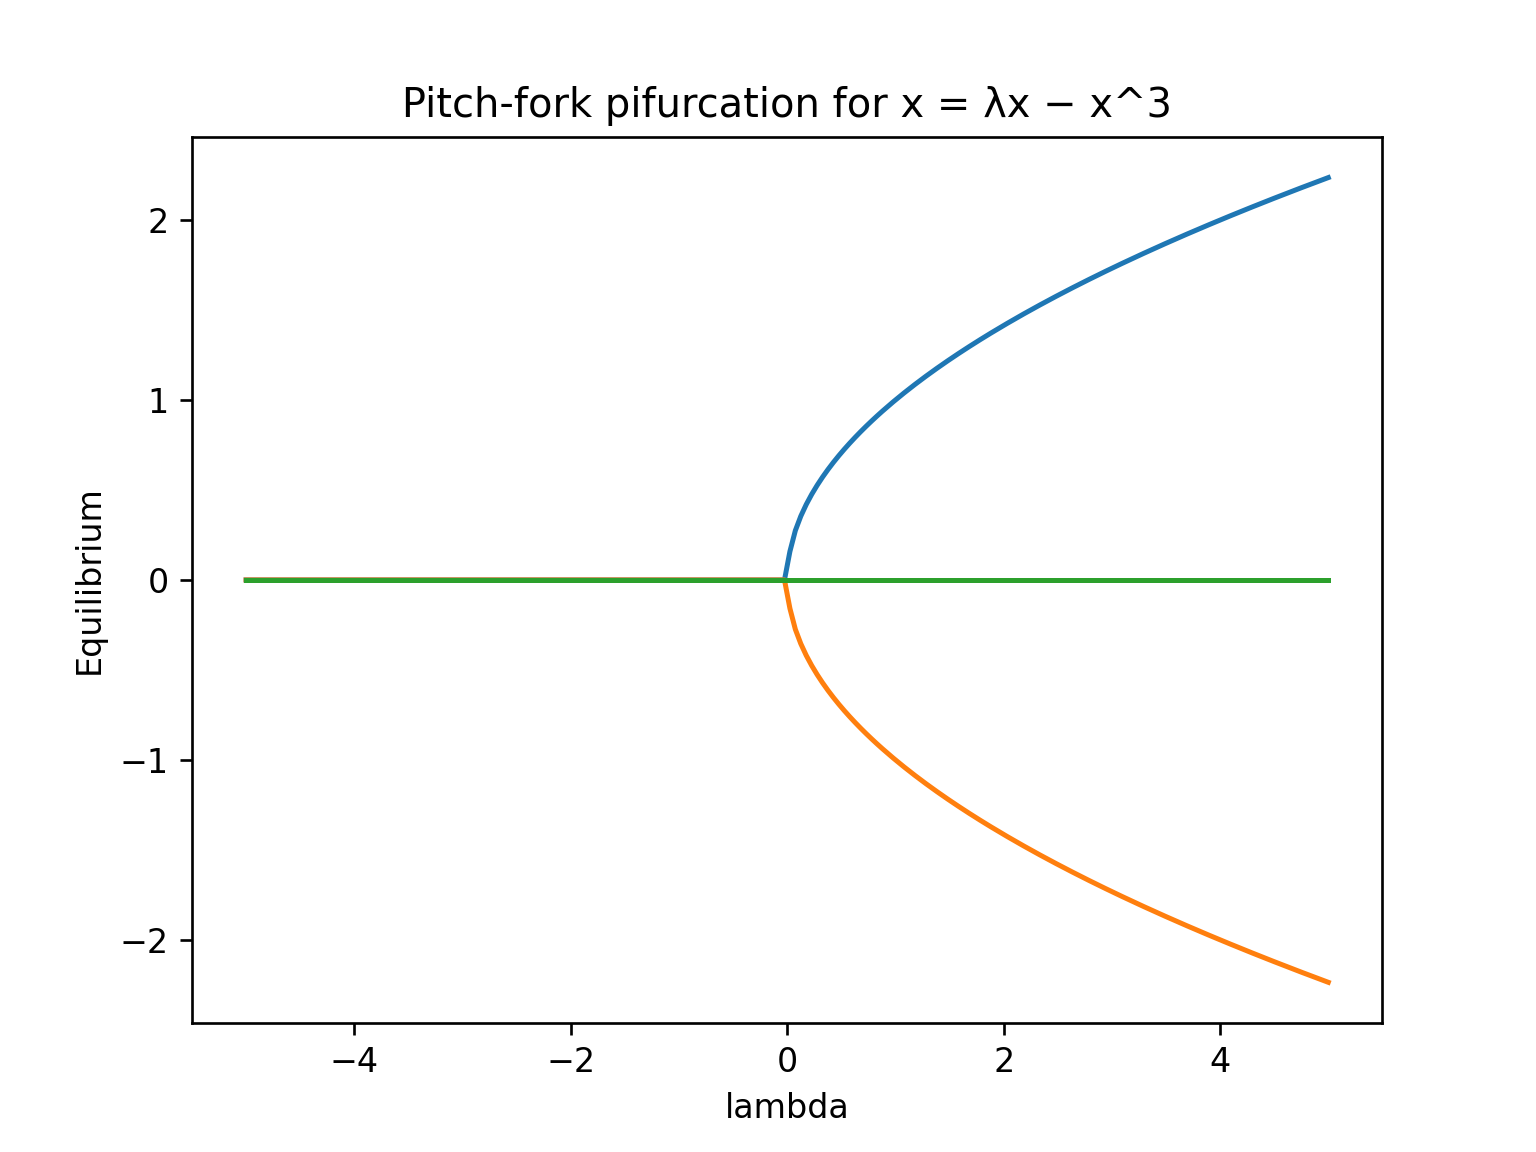

In [6]:
plt.plot(C1,X1)
plt.plot(C2,X2)
plt.plot(C3,X3) #plot each part of the diagram
plt.xlabel("lambda")
plt.ylabel("Equilibrium")
plt.title("Pitch-fork pifurcation for x = λx − x^3")

plt.show()

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

<IPython.core.display.Javascript object>


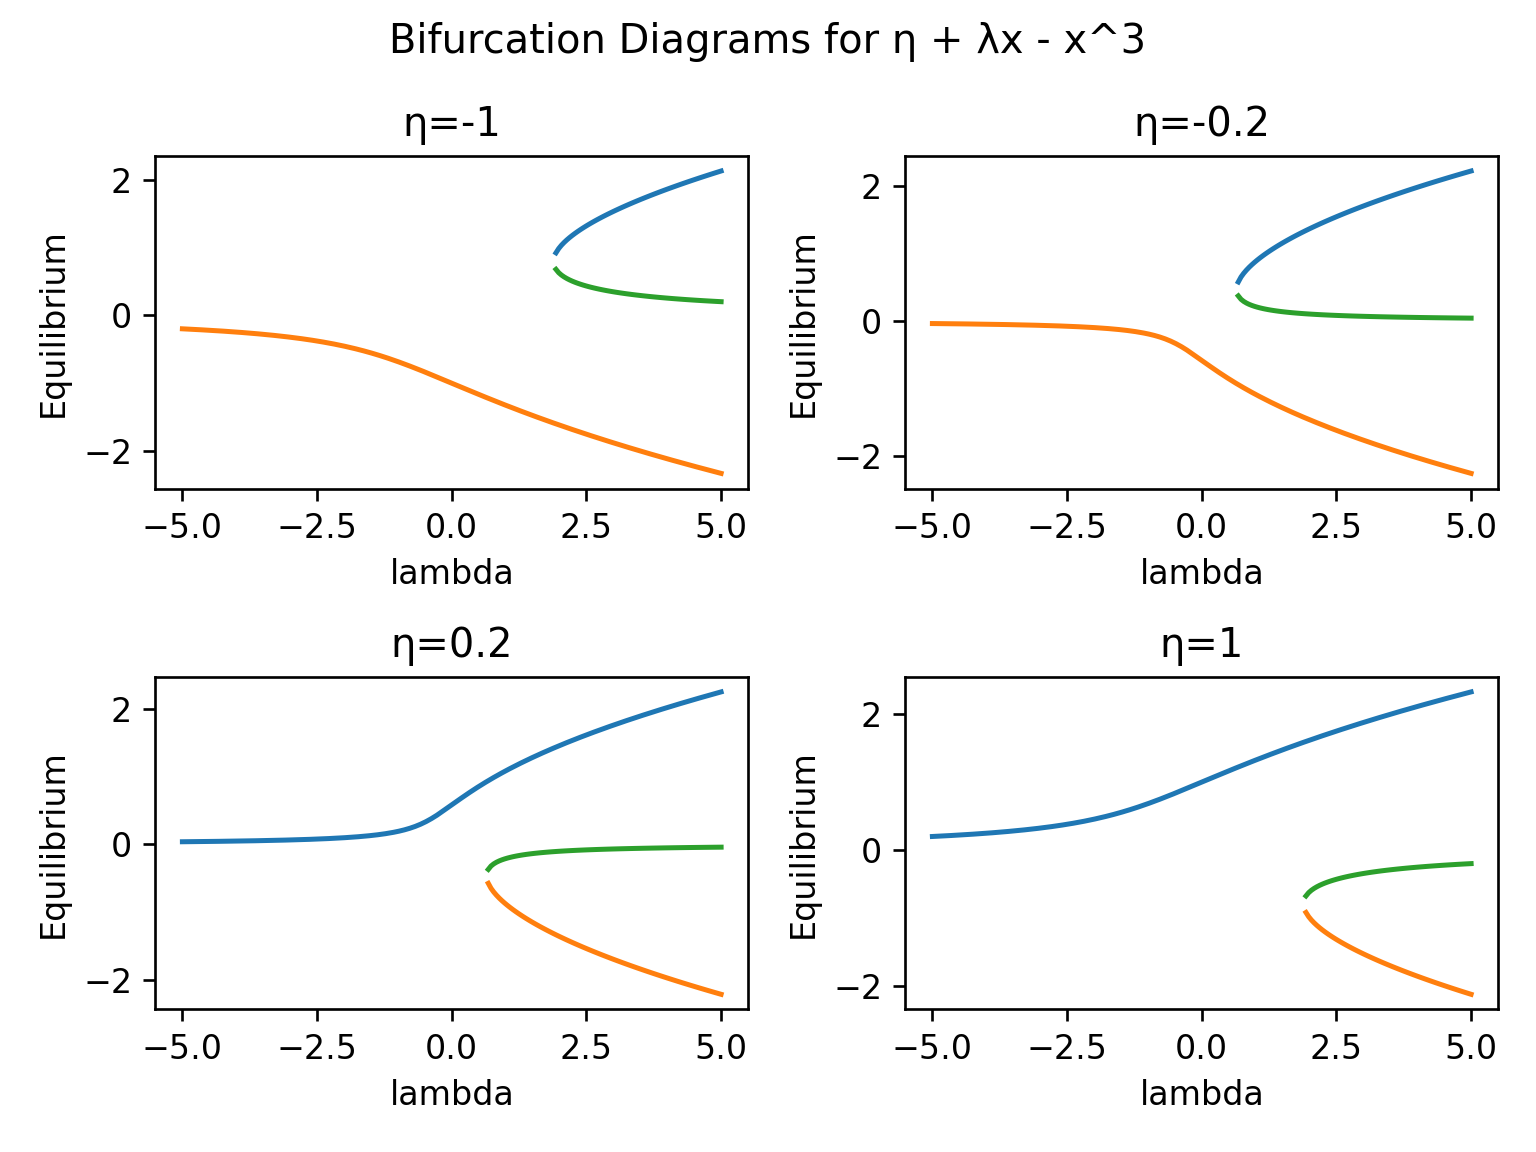

In [7]:
η_list = [-1,-.2,.2,1] #different values of eta

for i,η in enumerate(η_list):
    F = lambda x,lmbda: η + lmbda*x - x**3
    C1,X1 = EmbeddingAlg(np.linspace(-5,5,200)[::-1],np.sqrt(5),F) #each part of the diagram
    C2,X2 = EmbeddingAlg(np.linspace(-5,5,200)[::-1],-np.sqrt(5),F)
    C3,X3 = EmbeddingAlg(np.linspace(-5,5,200)[::-1],0,F)
    
    plt.subplot(2,2,i+1).plot(C1,X1) #index the subplots
    plt.subplot(2,2,i+1).plot(C2,X2)
    plt.subplot(2,2,i+1).plot(C3,X3)
    plt.xlabel("lambda")
    plt.ylabel("Equilibrium")
    plt.title(f"η={η}")
plt.suptitle("Bifurcation Diagrams for η + λx - x^3")
plt.tight_layout()
plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

<IPython.core.display.Javascript object>


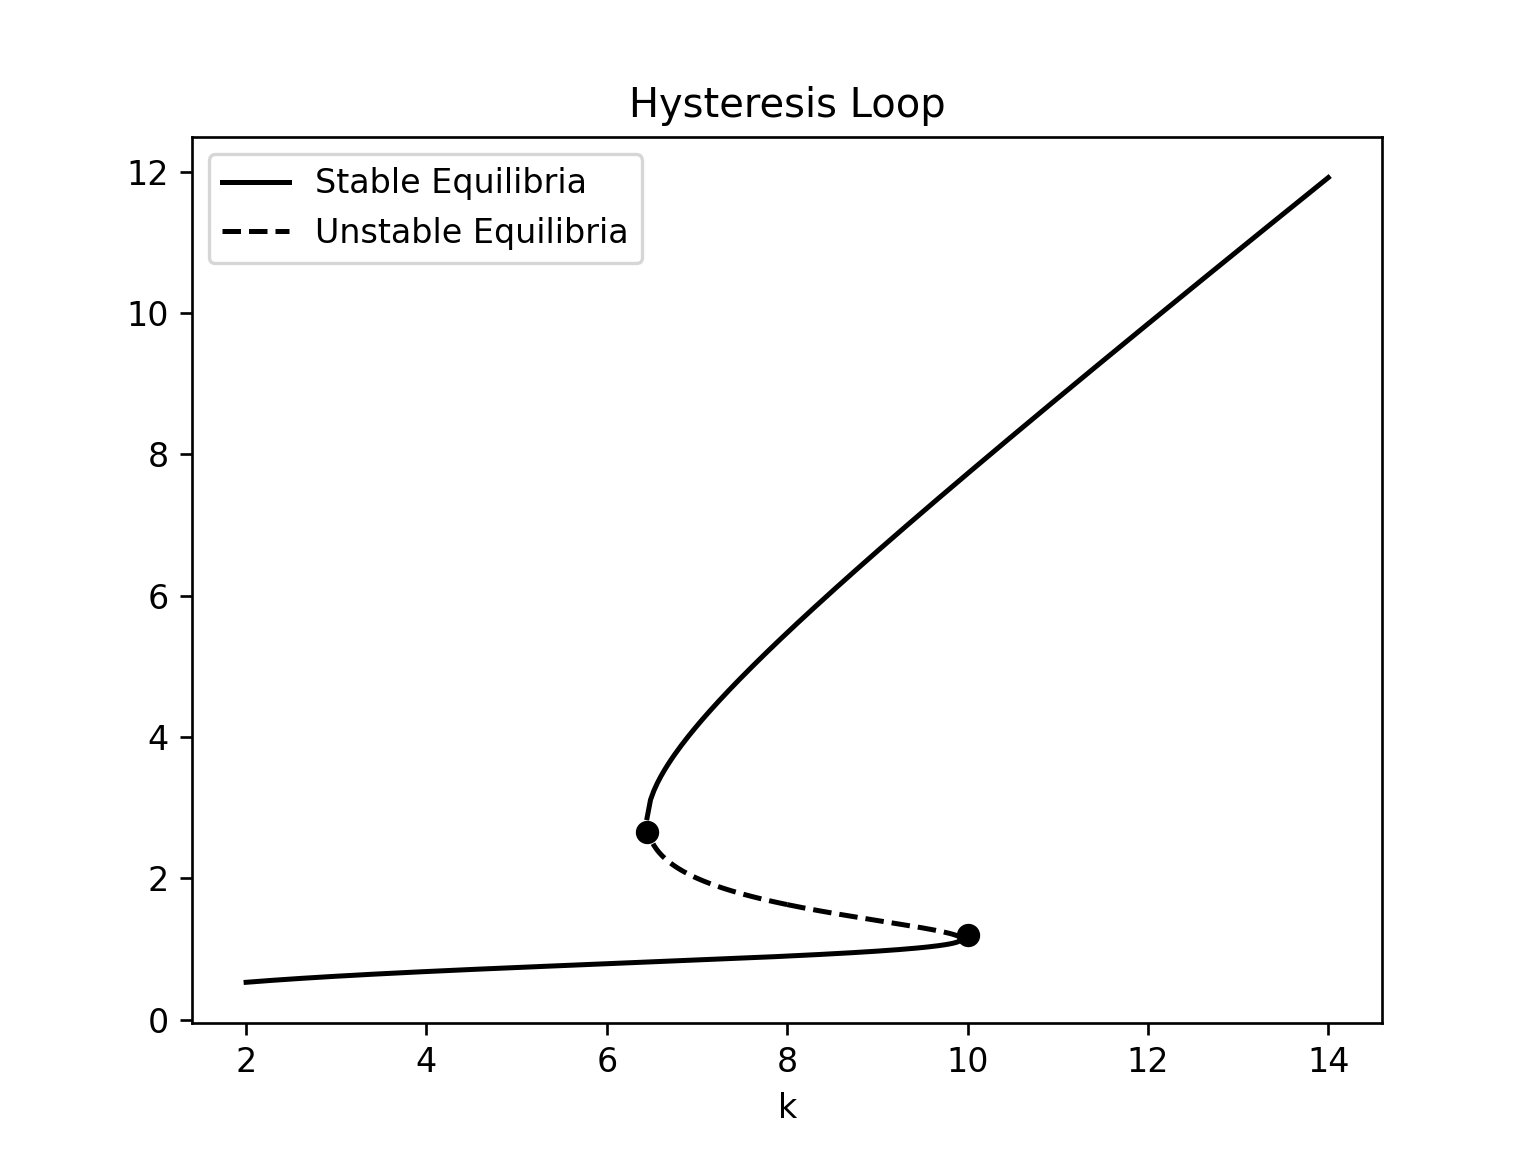

In [8]:
r = 0.56
F = lambda x,k: r*x*(1-x/k) - (x**2)/(1+x**2)

C1,X1 = EmbeddingAlg(np.linspace(2,10,200),2.5,F) #four parts of the bifurcations
C2,X2 = EmbeddingAlg(np.linspace(6.4465,14,200),8,F)
C3,X3 = EmbeddingAlg(np.linspace(2,8,200)[::-1],3,F) #gotta guess 3 because that's where the left bifurcation point x value is
C4,X4 = EmbeddingAlg(np.linspace(8,11,200),3,F)

plt.plot(C1,X1,'-k',label="Stable Equilibria")
plt.plot(C2,X2,'-k')
plt.scatter(6.4465,2.65,color='k')
plt.scatter(10,1.2,color='k')
plt.plot(C3,X3,'--k',label="Unstable Equilibria")
plt.plot(C4,X4,'--k')
plt.xlabel("k")
plt.title("Hysteresis Loop")
plt.legend() #yay
plt.show()
